In [ ]:
import pandas as pd

# read the file
df = pd.read_csv("D:/urban_garden_recommender/dataset/raw/Plant_data_details.csv")

# .....................Categorise features...............
# Define a mapping of old feature names to the new unified feature names.
feature_mapping = {
    'Sunlight': ['full_shade_sunlight', 'partial_sunlight', 'full_sunlight'],
    'Garden_Type': ['mediterranean_climate_plants_garden', 'architectural_garden', 'city_courtyard_gardens', 'cottage_informal_garden', 'wild_life_garden', 'patio_container_plants',
                   'hanging_basket_garden', 'sub_tropical_garden'],
    'Soil_pH': ['alkaline_pH', 'neutral_pH', 'acid_pH'],
    'Season': ['winter_season', 'summer_season', 'spring_season', 'autumn_season'],
    'Plant_Type': ['bedding_plant', 'climber_wall_shrub', 'herbaceous_perennial', 'houseplant', 'shrubs'],
    'Hardiness': ['H1A_Hardiness', 'H1B_Hardiness', 'H1C_Hardiness', 'H2_Hardiness', 'H3_Hardiness'],
    'Plant_Spread': ['0.1-0.5_meter_spread', '0.5-1.0_meter_spread', '1.0-1.5_meter_spread'],
    'Plant_Height': ['0.5-1.0_meter_height', '1.0-1.5_meter_height', '1.5-2.5_meter_height', '2.5-4.0_meter_height'],
    'Soil_Type': ['plant_chalk_soil', 'plant_clay_soil', 'plant_loam_soil', 'plant_sand_soil'],
    'Plant_Aspect': ['plant_east_facing_aspect', 'plant_west_facing_aspect', 'plant_north_facing_aspect', 'plant_south_facing_aspect']
}

# Function to unify features
def unify_features(row, feature_names):
    for feature in feature_names:
        if row[feature] == 1:
            return feature
    return 'unknown'

# Create new unified features based on the mapping
for new_feature, old_features in feature_mapping.items():
    df[new_feature] = df.apply(lambda row: unify_features(row, old_features), axis=1)
    df = df.drop(columns=old_features)
plant_data = df.copy()
plant_data = df.drop(columns='Botanical Name')
plant_data.to_csv('D:/urban_garden_recommender/dataset/preprocess/plant_details_preprocessed.csv')

In [ ]:
plant_data.head()

,Common Name,Sunlight,Garden_Type,Soil_pH,Season,Plant_Type,Hardiness,Plant_Spread,Plant_Height,Soil_Type,Plant_Aspect
0,skimmia 'Nymans',full_shade_sunlight,city_courtyard_gardens,alkaline_pH,winter_season,shrubs,unknown,1.0-1.5_meter_spread,0.5-1.0_meter_height,plant_chalk_soil,plant_east_facing_aspect
1,ivy 'Goldchild',full_shade_sunlight,city_courtyard_gardens,alkaline_pH,winter_season,climber_wall_shrub,unknown,0.1-0.5_meter_spread,0.5-1.0_meter_height,plant_chalk_soil,plant_east_facing_aspect
2,laurustinus 'Eve Price',full_shade_sunlight,city_courtyard_gardens,alkaline_pH,winter_season,shrubs,unknown,unknown,1.5-2.5_meter_height,plant_chalk_soil,plant_east_facing_aspect
3,striped bloody cranesbill,full_shade_sunlight,cottage_informal_garden,alkaline_pH,summer_season,herbaceous_perennial,unknown,0.1-0.5_meter_spread,unknown,plant_chalk_soil,plant_east_facing_aspect
4,Japanese aralia 'Variegata',full_shade_sunlight,architectural_garden,alkaline_pH,winter_season,shrubs,unknown,unknown,1.5-2.5_meter_height,plant_chalk_soil,plant_east_facing_aspect


In [ ]:
plant_data.shape

(21947, 11)

In [ ]:
# Check for columns with null values
print(f"{plant_data.isnull().sum()}\n")

# Check for duplicates in the all dataframe
print(f"{plant_data.duplicated()}\n")

# Check duplicates on the specific columns
print(f"Duplicates on feature columns: {plant_data.duplicated(subset=['Sunlight', 'Garden_Type', 'Soil_pH', 'Season', 'Plant_Height',
                                                                      'Plant_Type', 'Hardiness', 'Plant_Spread', 'Soil_Type', 'Plant_Aspect'])}\n")

# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Duplicate rows: {plant_data[plant_data.duplicated()]}")

Common Name     3225
Sunlight           0
Garden_Type        0
Soil_pH            0
Season             0
Plant_Type         0
Hardiness          0
Plant_Spread       0
Plant_Height       0
Soil_Type          0
Plant_Aspect       0
dtype: int64

0        False
1        False
2        False
3        False
4        False
         ...  
21942    False
21943    False
21944    False
21945    False
21946    False
Length: 21947, dtype: bool

Duplicates on feature columns: 0        False
1        False
2        False
3        False
4        False
         ...  
21942     True
21943     True
21944     True
21945     True
21946    False
Length: 21947, dtype: bool

Duplicate rows:                             Common Name             Sunlight  \
426                                 NaN  full_shade_sunlight   
446                                 NaN  full_shade_sunlight   
447                                 NaN  full_shade_sunlight   
448                                 NaN  full_shade_sunlight   
45

In [ ]:
# Drop duplicates.
plant_data = plant_data.copy()
plant_data = plant_data.drop_duplicates(subset=['Sunlight', 'Garden_Type', 'Soil_pH', 'Season', 'Plant_Height',
                                                                      'Plant_Type', 'Hardiness', 'Plant_Spread', 'Soil_Type', 'Plant_Aspect'])
# Drop null values on Common Name field.
plant_data = plant_data.dropna(subset=['Common Name'])
print(f"{plant_data.isnull().sum()}\n")
print(f"Dimension of the new dataframe: {plant_data.shape}")

Common Name     0
Sunlight        0
Garden_Type     0
Soil_pH         0
Season          0
Plant_Type      0
Hardiness       0
Plant_Spread    0
Plant_Height    0
Soil_Type       0
Plant_Aspect    0
dtype: int64

Dimension of the new dataframe: (6396, 11)


In [ ]:
# check for unique class on Common Name field
unique_common_names = plant_data['Common Name'].unique()
# Check for the number of unique Common Names
unique_common_names_counts = plant_data['Common Name'].nunique()
# Check the frequency of each unique values
unique_common_names_value_counts = plant_data['Common Name'].value_counts()
print(f"Unique values in column 'Common Name': {unique_common_names}\n"
f"Number of unique values in column 'Common Name':\n{unique_common_names_counts}\n"
f"Frequency of each unique values in column 'Common Name':\n{unique_common_names_value_counts}")

Unique values in column 'Common Name': ["skimmia 'Nymans'" "ivy 'Goldchild'" "laurustinus 'Eve Price'" ...
 'cabbage palm [Electric Star]' "rose 'Glory of Edzell'"
 "blackberry 'Black Satin'"]
Number of unique values in column 'Common Name':
6267
Frequency of each unique values in column 'Common Name':
Common Name
desert rose                 4
sweet box                   3
bird of paradise            3
Chilean bellflower          3
bamboo palm                 3
                           ..
two-coloured columbine      1
tickseed 'Sonnenkind'       1
rose 'Arthur Hillier'       1
Kermadec hebe               1
blackberry 'Black Satin'    1
Name: count, Length: 6267, dtype: int64


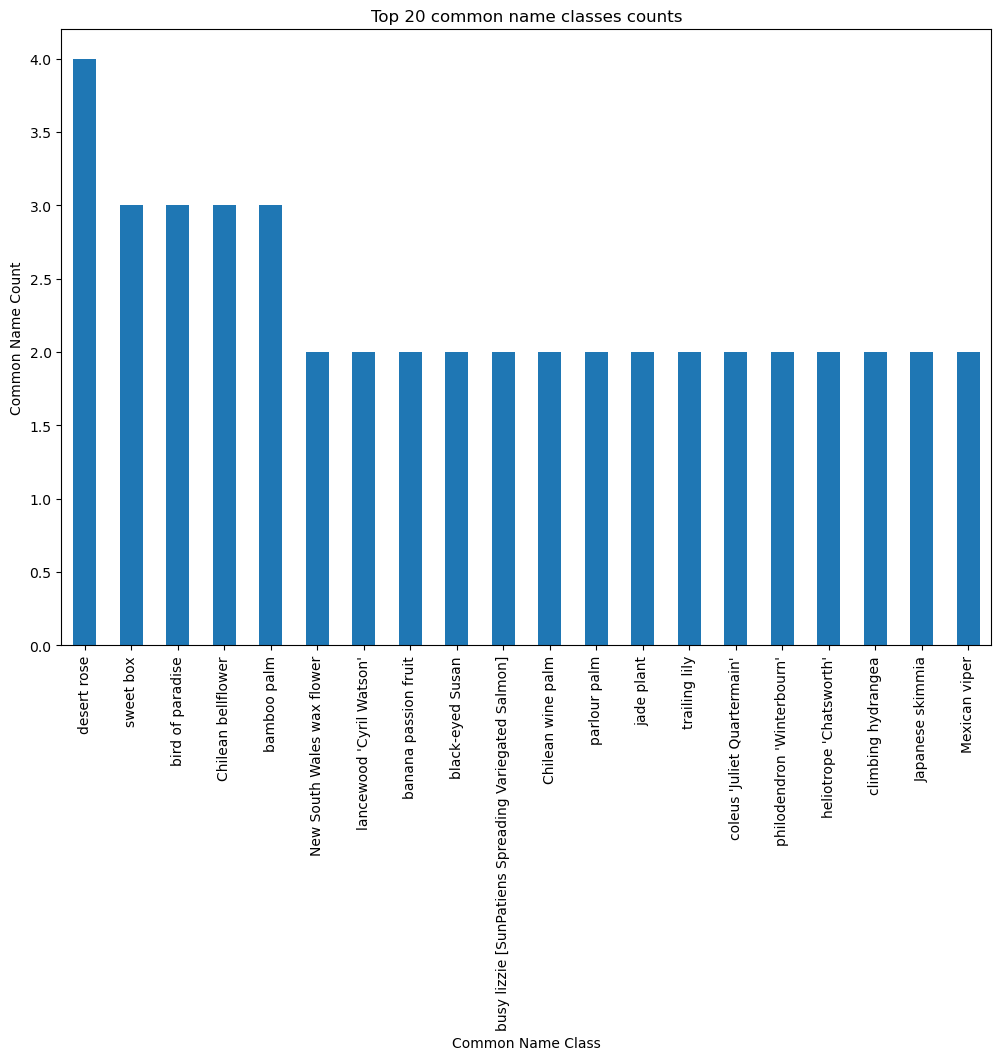

In [ ]:
#....................................Check for class imbalance by plotting top ten class counts and class count distribution...................
import matplotlib.pyplot as plt

class_distribution = pd.DataFrame({'Plant_Name_Counts': unique_common_names_value_counts})

# Top Common_name classes
common_name = 20
top_classes = class_distribution.head(common_name)

# Plotting class counts for top Common_name classes
plt.figure(figsize=(12, 8))
top_classes['Plant_Name_Counts'].plot(kind='bar')
plt.title(f"Top {common_name} common name classes counts")
plt.xlabel('Common Name Class')
plt.ylabel('Common Name Count')
plt.show()

       Plant_Name_Counts
count        6267.000000
mean            1.020584
std             0.149659
min             1.000000
25%             1.000000
50%             1.000000
75%             1.000000
max             4.000000


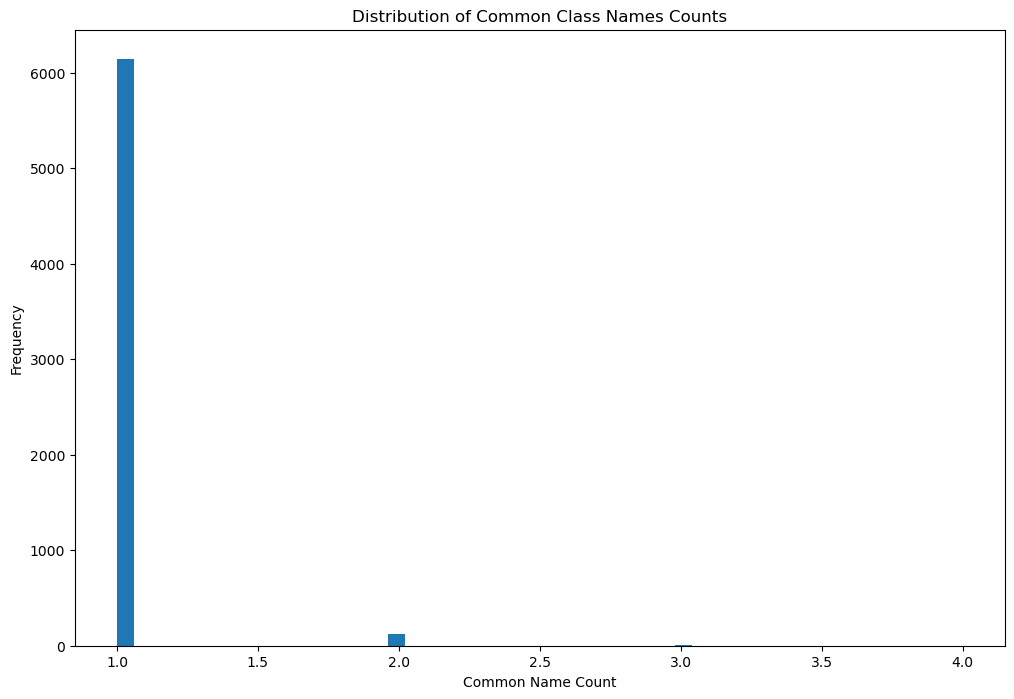

In [ ]:
# ....................Explore and analyze class distribution..............
# Summary statistics
print(class_distribution.describe())

# Visualize the distribution of class count
plt.figure(figsize=(12, 8))
class_distribution['Plant_Name_Counts'].plot(kind='hist', bins=50)
plt.title("Distribution of Common Class Names Counts")
plt.xlabel('Common Name Count')
plt.ylabel('Frequency')
plt.show()

#### Apply Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
plant_data.head()

,Common Name,Sunlight,Garden_Type,Soil_pH,Season,Plant_Type,Hardiness,Plant_Spread,Plant_Height,Soil_Type,Plant_Aspect
0,skimmia 'Nymans',full_shade_sunlight,city_courtyard_gardens,alkaline_pH,winter_season,shrubs,unknown,1.0-1.5_meter_spread,0.5-1.0_meter_height,plant_chalk_soil,plant_east_facing_aspect
1,ivy 'Goldchild',full_shade_sunlight,city_courtyard_gardens,alkaline_pH,winter_season,climber_wall_shrub,unknown,0.1-0.5_meter_spread,0.5-1.0_meter_height,plant_chalk_soil,plant_east_facing_aspect
2,laurustinus 'Eve Price',full_shade_sunlight,city_courtyard_gardens,alkaline_pH,winter_season,shrubs,unknown,unknown,1.5-2.5_meter_height,plant_chalk_soil,plant_east_facing_aspect
3,striped bloody cranesbill,full_shade_sunlight,cottage_informal_garden,alkaline_pH,summer_season,herbaceous_perennial,unknown,0.1-0.5_meter_spread,unknown,plant_chalk_soil,plant_east_facing_aspect
4,Japanese aralia 'Variegata',full_shade_sunlight,architectural_garden,alkaline_pH,winter_season,shrubs,unknown,unknown,1.5-2.5_meter_height,plant_chalk_soil,plant_east_facing_aspect


In [ ]:
print(plant_data.isnull().sum())

Common Name     0
Sunlight        0
Garden_Type     0
Soil_pH         0
Season          0
Plant_Type      0
Hardiness       0
Plant_Spread    0
Plant_Height    0
Soil_Type       0
Plant_Aspect    0
dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder for dense output
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
# One-Hot Encoding
df = plant_data.copy()
features = ['Sunlight', 'Garden_Type', 'Soil_pH', 'Season', 'Plant_Type', 'Hardiness', 'Plant_Spread', 'Plant_Height', 'Soil_Type', 'Plant_Aspect']
encoded_features = encoder.fit_transform(df[features])

# Update the DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
encoded_df['Common Name'] = df['Common Name']

# Drop rows with missing values
encoded_df_cleaned = encoded_df.dropna()

In [ ]:
def recommend_plants(user_input, encoded_df, encoder):
    # Encode user input
    user_encoded = encoder.transform([user_input])

    # Check for NaN values in user_encoded
    print("NaN values in user input encoded:\n", pd.DataFrame(user_encoded).isnull().sum())

    # Calculate cosine similarity
    similarities = cosine_similarity(user_encoded, encoded_df.drop(columns=['Common Name']).values)

    # Check if similarities contain NaNs
    if np.isnan(similarities).any():
        print("Warning: Similarities contain NaN values")

    # Get top 5 recommendations
    top_5_indices = np.argsort(similarities[0])[-5:][::-1]
    top_5_plants = encoded_df.iloc[top_5_indices]

    return top_5_plants

# Example user input
# user_input = ['full_sunlight', 'city_courtyard_gardens', 'neutral_pH', 'summer_season', 'houseplant', 'H1B_Hardiness', '0.5-1.0_meter_spread', '1.5-2.5_meter_height', 'plant_clay_soil', 'plant_west_facing_aspect']
user_input = ['full_sunlight', 'city_courtyard_gardens', 'neutral_pH', 'summer_season', 'houseplant']

# Get recommendations
recommendations = recommend_plants(user_input, encoded_df_cleaned, encoder)
print(recommendations[['Common Name', 'Plant_Spread', 'Plant_Type']])

NaN values in user input encoded:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
dtype: int64
                           Common Name
4414                   magnolia 'Lois'
3305   Romieux hoop petticoat daffodil
2806                peony 'Emma Klehm'
3145          great white rhododendron
3135  deciduous camellia Koreana Group


C:\Users\LOCATE01\anaconda3\envs\Urban_Gardening\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


#### Attempting Isolation of Minority Classes.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import numpy as np

# Example DataFrame with categorical and numerical data
df = plant_data.copy()

# Separate features and target
X = df.drop('Common Name', axis=1)
y = df['Common Name']

# Convert categorical features to numerical using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), X.columns)
    ])

# Fit and transform the data
X_encoded = preprocessor.fit_transform(X)

# Convert target labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize Isolation Forest (for the entire data as no majority class)
iso_forest = IsolationForest(contamination=0.5, random_state=42)

# Fit the model
iso_forest.fit(X_encoded)

# Predict anomalies
y_pred = iso_forest.predict(X_encoded)

# Convert the predictions: anomalies (-1) to minority class (1), normal (1) to majority class (0)
y_pred = np.where(y_pred == -1, 1, 0)

# Evaluate the model
print(classification_report(y_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          17       0.00    

C:\Users\LOCATE01\anaconda3\envs\Urban_Gardening\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOCATE01\anaconda3\envs\Urban_Gardening\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOCATE01\anaconda3\envs\Urban_Gardening\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

## **Use Machine Learning Techniques.**

In [ ]:
# import libraries and prepare the data to use
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
print(f"Packages loaded successfully.")

# data to use
data = plant_data.copy() # Create checkpoints in order not to interfere with the previous dataset.
print(f"Data shape: {data.shape}")

Packages loaded successfully.
Data shape: (6396, 11)


### **1. Encode Categorical Features and Target.**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X = data.drop('Common Name', axis=1)
y= data['Common Name']

# Identify categorical columns
categorical_features = X.columns

# Create a Column Transformer for encoding features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ]
)

# Apply preprocessing to features
X_encoded = preprocessor.fit_transform(X)

# Encode target
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_encoded = y_encoder.fit_transform(y.values.reshape(-1, 1))

### **2. Split The Data into Training Set and Testing Set.**
You should split the data after applying the initial encoding (excluding the target variable encoding) to ensure
the model receives properly formatted input.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

### **3. Create Pipeline for Each Model using Class Weight Adjustment.**
Create pipelines for each machine learning algorithm using the encoded data
#### Random Forest:

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline

# rf_pipeline = Pipeline(steps=[
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

#### Ensemble Learning.

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\LOCATE01\anaconda3\envs\Urban_Gardening\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOCATE01\anaconda3\envs\Urban_Gardening\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOCATE01\anaconda3\envs\Urban_Gardening\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# # Create base models
# model1 = RandomForestClassifier(random_state=42)
# model2 = LogisticRegression(max_iter=1000, random_state=42)
# model3 = SVC(probability=True, random_state=42)

# ensemble_pipeline = Pipeline(steps=[
#     ('classifier', VotingClassifier(estimators=[
#         ('rf', model1), ('lr', model2), ('svc', model3)
#     ], voting='soft'))
# ])

# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC

# # Create base models
# model1 = LogisticRegression(class_weight='balanced', random_state=42)
# model2 = RandomForestClassifier(class_weight='balanced', random_state=42)
# model3 = SVC(class_weight='balanced', random_state=42)

# # Create an ensemble model
# ensemble_model = VotingClassifier(estimators=[
#     ('lr', model1), ('rf', model2), ('svc', model3)], voting='hard')

# ensemble_model.fit(X_train, y_train)

# # Make predictions
# y_pred = ensemble_model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))

#### XGBOOST.

In [ ]:
# !pip install xgboost

In [ ]:
# import xgboost as xgb

# xgb_pipeline = Pipeline(steps=[
#     ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
# ])

#### Support Vector Machine.

In [ ]:
# from sklearn.svm import SVC

# svm_pipeline = Pipeline(steps=[
#     ('classifier', SVC(probability=True, random_state=42))
# ])

### **4. Evaluate Model Performance**
Fit each model and evaluate performance.

#### Random Forest

In [ ]:
# from sklearn.metrics import classification_report

# # Fit and evaluate Random Forest
# rf_pipeline.fit(X_train, y_train)
# y_pred_rf = rf_pipeline.predict(X_test)
# print("Random Forest Classification Report:")
# print(classification_report(y_test, y_pred_rf, target_names=y_encoder.categories_[0]))

#### Ensemble Learning

In [ ]:
# # Fit and evaluate Ensemble Learning
# ensemble_pipeline.fit(X_train, y_train)
# y_pred_ensemble = ensemble_pipeline.predict(X_test)
# print("Ensemble Learning Classification Report:")
# print(classification_report(y_test, y_pred_ensemble, target_names=y_encoder.categories_[0]))

#### XGBoost

In [ ]:
# # Fit and evaluate XGBoost
# xgb_pipeline.fit(X_train, y_train)
# y_pred_xgb = xgb_pipeline.predict(X_test)
# print("XGBoost Classification Report:")
# print(classification_report(y_test, y_pred_xgb, target_names=y_encoder.categories_[0]))

#### Support Vector Machine

In [ ]:
# # Fit and evaluate Support Vector Machine
# svm_pipeline.fit(X_train, y_train)
# y_pred_svm = svm_pipeline.predict(X_test)
# print("Support Vector Machine Classification Report:")
# print(classification_report(y_test, y_pred_svm, target_names=y_encoder.categories_[0]))